### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature.
plt.style.use('fivethirtyeight') # This is a styling option for how plots will appear. 

In [2]:
path = r"C:\Users\ahamr\Desktop\6.1"

In [3]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'data_checked.csv'))

### 2. Prep the data

In [4]:
df.head()

,Unnamed: 0,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [5]:
df=df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head()

,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [7]:
df.shape

(24682, 12)

In [8]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'magnitude',
       'number_stations_reported', 'gap_between_stations',
       'root_mean_square_amplitude_spectrum', 'id', 'place', 'type', 'status'],
      dtype='object')

In [9]:
df_sub= df[['time', 'magnitude']]

In [10]:
df_sub.head()

,time,magnitude
0,2023-01-01 00:49:25.294000+00:00,3.10
1,2023-01-01 01:41:43.755000+00:00,4.50
2,2023-01-01 03:29:31.070000+00:00,3.93
3,2023-01-01 04:09:32.814000+00:00,4.30
4,2023-01-01 04:29:13.793000+00:00,3.00


In [11]:
df_sub['time'] = pd.to_datetime(df_sub['time'], format="%Y-%m-%d %H:%M:%S.%f%z", errors='coerce')
df_sub['date'] = df_sub['time'].dt.strftime('%Y-%m-%d')
df_sub['avg_magnitude'] = df_sub.groupby('date')['magnitude'].transform('mean')
df_sub['num_earthquakes'] = df_sub.groupby('date')['magnitude'].transform('count')

# Drop the original 'time' and 'magnitude' columns
df_sub = df_sub.drop(columns=['time', 'magnitude'])

# Drop duplicate rows based on the 'date' column
df_sub = df_sub.drop_duplicates(subset=['date'])

# Display the resulting DataFrame
print(df_sub)

             date  avg_magnitude  num_earthquakes
0      2023-01-01       3.936618             68.0
55     2023-01-02       3.941348             89.0
117           NaN            NaN              NaN
130    2023-01-03       3.878587             92.0
201    2023-01-04       3.834925             67.0
...           ...            ...              ...
19086  2023-12-25       3.878571             28.0
19106  2023-12-26       3.773784             37.0
19130  2023-12-27       3.793659             41.0
19162  2023-12-28       4.134186             43.0
19190  2023-12-29       3.920357             28.0

[364 rows x 3 columns]


In [12]:
df_sub.head()

,date,avg_magnitude,num_earthquakes
0,2023-01-01,3.936618,68.0
55,2023-01-02,3.941348,89.0
117,NaN,NaN,NaN
130,2023-01-03,3.878587,92.0
201,2023-01-04,3.834925,67.0


In [13]:
df_sub.isnull().sum()

date               1
avg_magnitude      1
num_earthquakes    1
dtype: int64

In [14]:
df_sub = df_sub.dropna(subset=['date'])

In [15]:
df_sub.head()

,date,avg_magnitude,num_earthquakes
0,2023-01-01,3.936618,68.0
55,2023-01-02,3.941348,89.0
130,2023-01-03,3.878587,92.0
201,2023-01-04,3.834925,67.0
254,2023-01-05,4.031818,55.0


In [16]:
df_sub = df_sub.set_index('date')

In [17]:
df_sub.head()

,avg_magnitude,num_earthquakes
date,,
2023-01-01,3.936618,68.0
2023-01-02,3.941348,89.0
2023-01-03,3.878587,92.0
2023-01-04,3.834925,67.0
2023-01-05,4.031818,55.0


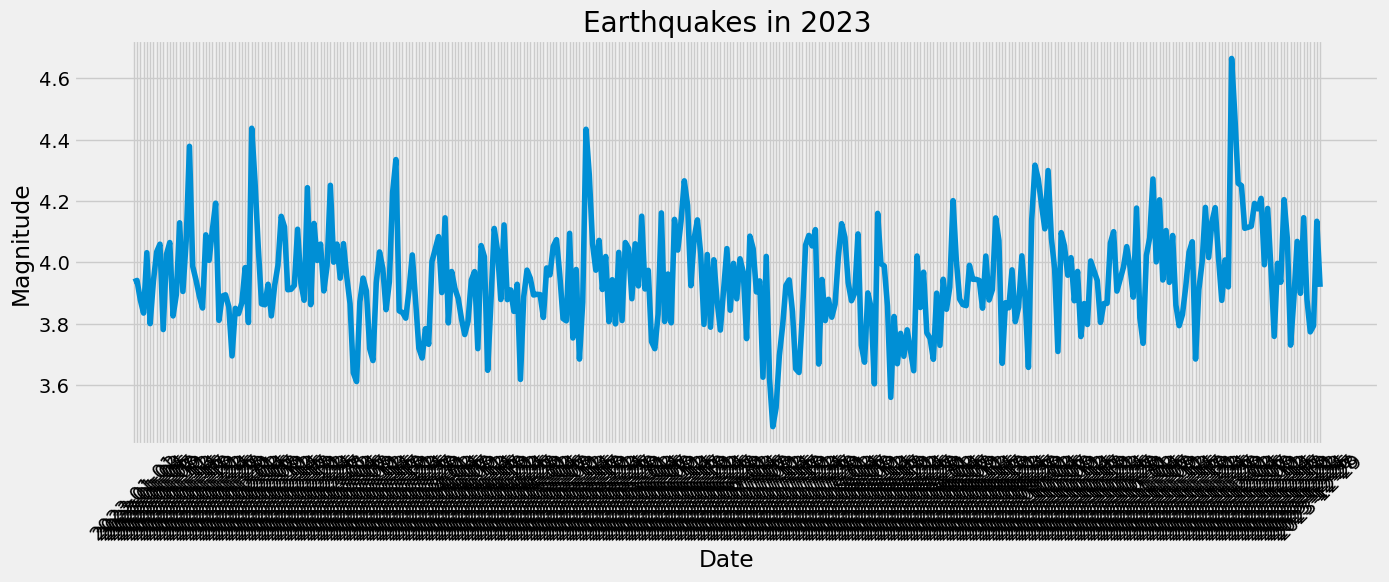

In [18]:
plt.figure(figsize=(15, 5), dpi=100)

# Plot the data
plt.plot(df_sub.index, df_sub['avg_magnitude'])

plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Earthquakes in 2023')

plt.xticks(rotation=45)

plt.show()

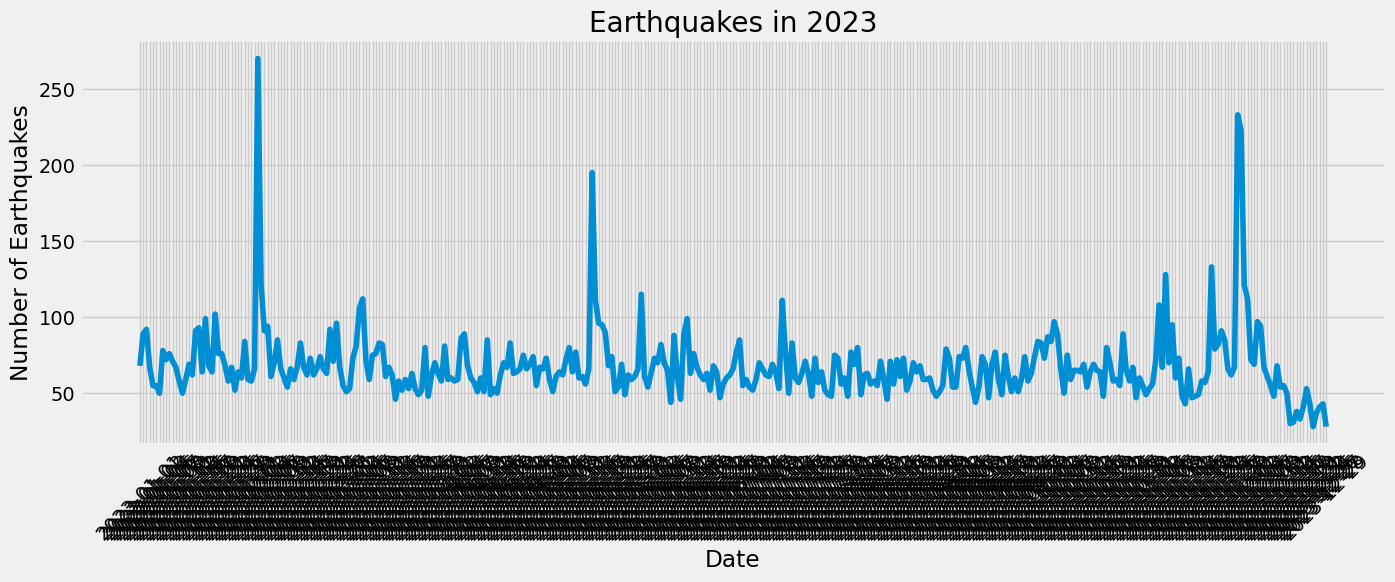

In [19]:
plt.figure(figsize=(15, 5), dpi=100)

# Plot the data
plt.plot(df_sub.index, df_sub['num_earthquakes'])

plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes in 2023')

plt.xticks(rotation=45)

plt.show()

### 3. Time-series analysis: decomposition

#### 3.1 Decomposition of "avg_magnitude"

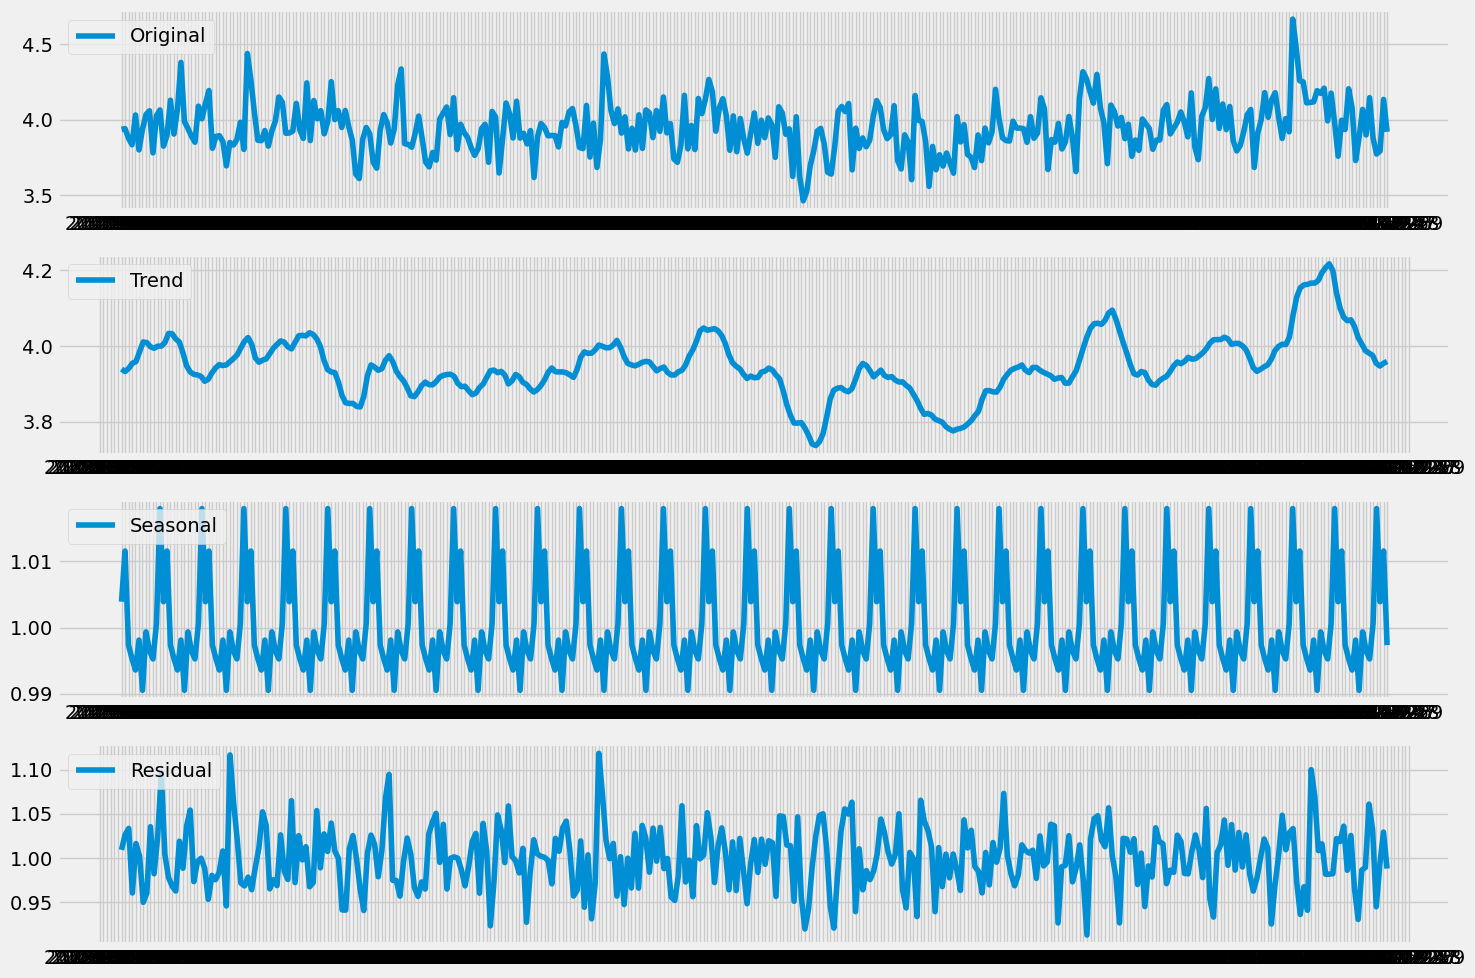

In [20]:
# Specify the period for seasonal decomposition
period = 12  

# Decompose the time series using a multiplicative model
decomposition = sm.tsa.seasonal_decompose(df_sub['avg_magnitude'], model='multiplicative', period=period)

# Plot the decomposition results
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df_sub.index, df_sub['avg_magnitude'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(df_sub.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(df_sub.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(df_sub.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### 3.2 Decomposition of "num_earthquakes"

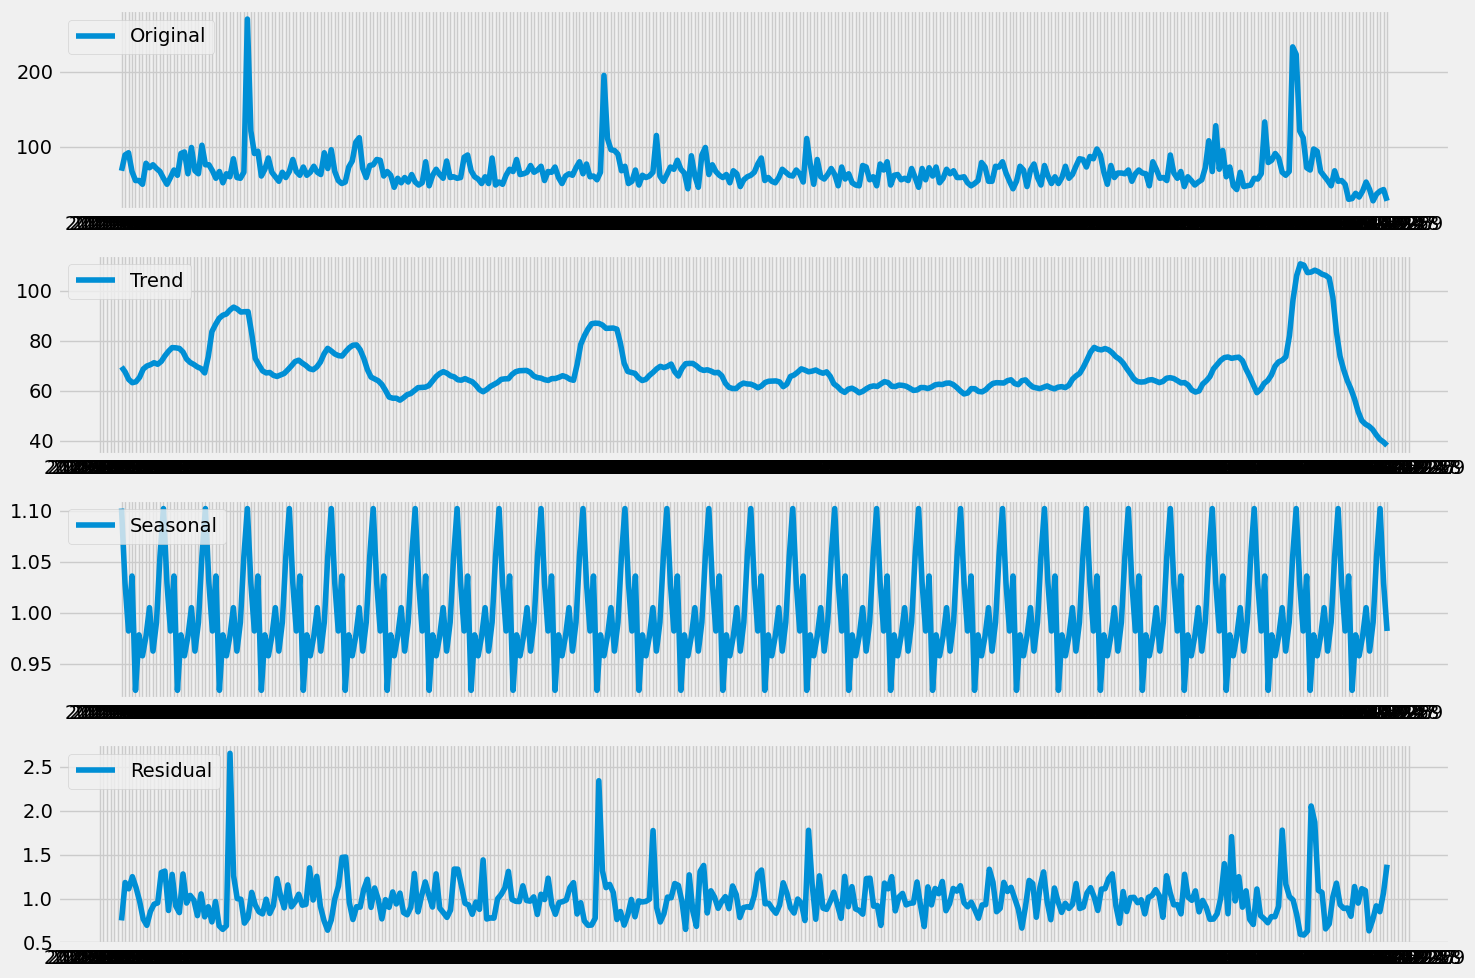

In [21]:
# Repeating the action with "num_earthquakes"

# Specify the period for seasonal decomposition
period = 12  

# Decompose the time series using a multiplicative model
decomposition = sm.tsa.seasonal_decompose(df_sub['num_earthquakes'], model='multiplicative', period=period)

# Plot the decomposition results
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df_sub.index, df_sub['num_earthquakes'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(df_sub.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(df_sub.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(df_sub.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 4. Testing for stationarity

#### 4.1 Testing "avg_magnitude"

In [22]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['avg_magnitude'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.850606e+00
p-value                        4.496369e-17
Number of Lags Used            1.000000e+00
Number of Observations Used    3.610000e+02
Critical Value (1%)           -3.448595e+00
Critical Value (5%)           -2.869580e+00
Critical Value (10%)          -2.571053e+00
dtype: float64


#### RESULT:
Test statistic smaller than critical value(5%)=
(-9.8<-2.8) = can reject null hypothesis = no unit root 
= stationary data = can proceed with forecast

#### 4.2 Testing "num_earthquakes" 

In [23]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['num_earthquakes'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.201517e+01
p-value                        3.114461e-22
Number of Lags Used            0.000000e+00
Number of Observations Used    3.620000e+02
Critical Value (1%)           -3.448544e+00
Critical Value (5%)           -2.869557e+00
Critical Value (10%)          -2.571041e+00
dtype: float64


#### RESULT:
Test statistic smaller than critical value(5%)= (-1.201517e+01<-2.8) = we can reject null hypothesis = no unit root = stationary data = we can proceed with forecast

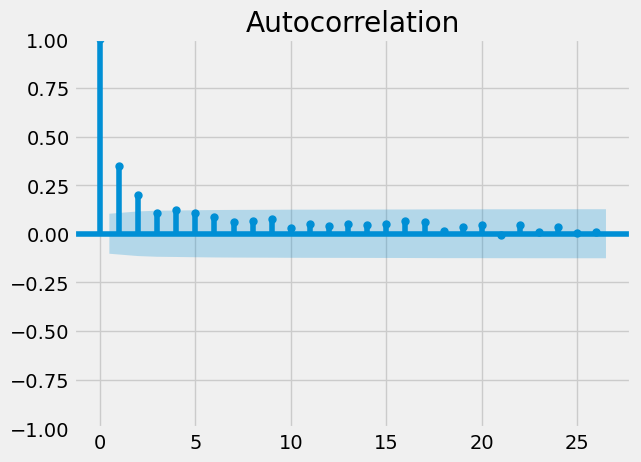

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_sub['avg_magnitude'])
plt.show()

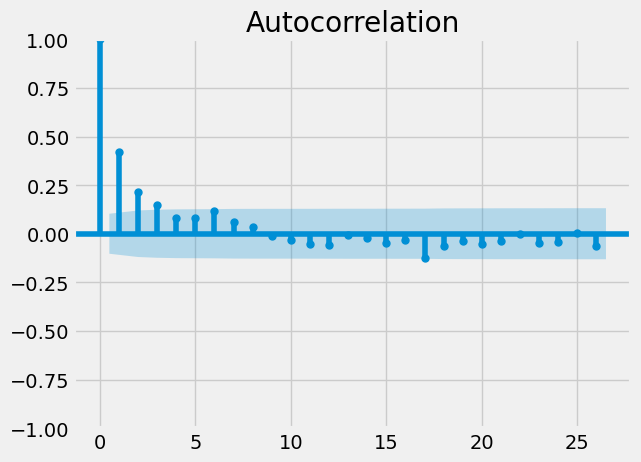

In [25]:
# Check out a plot of autocorrelations with second column

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_sub['num_earthquakes'])
plt.show()

### SUMMARY:

We conducted an end-to-end time-series analysis that helped me to look closer at the time pattern in the data according to the average magnitude or number of earthquakes per day for a year.

We considered two cases in which the data appeared to be stationary.

In [26]:
df_sub.head()

,avg_magnitude,num_earthquakes
date,,
2023-01-01,3.936618,68.0
2023-01-02,3.941348,89.0
2023-01-03,3.878587,92.0
2023-01-04,3.834925,67.0
2023-01-05,4.031818,55.0


In [27]:
#Exporting df
df_sub.to_csv(os.path.join(path,'Prepared Data', 'data_time.csv'))

## Bonus Task

In [28]:
df= df_sub[['avg_magnitude']]

In [29]:
df.head()

,avg_magnitude
date,
2023-01-01,3.936618
2023-01-02,3.941348
2023-01-03,3.878587
2023-01-04,3.834925
2023-01-05,4.031818


In [30]:
df.shape

(363, 1)

### 1. Defining Parameters

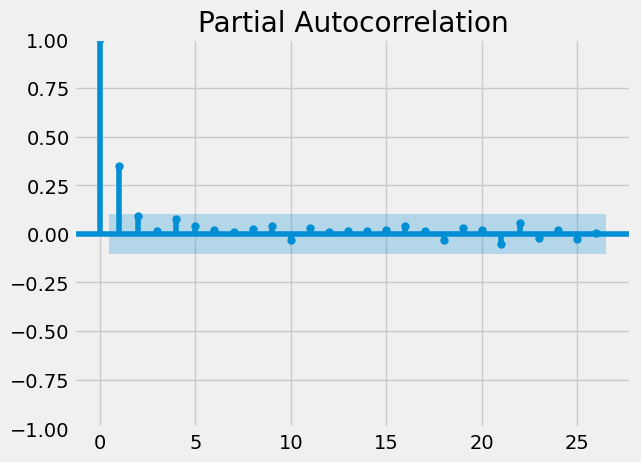

<Figure size 4500x4500 with 0 Axes>

In [31]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(df)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

We can see that we have some highly positive bars. These indicate
significant correlations. Let’s start by picking 5 AR terms to compensate for the highest of the
partial autocorrelations. This makes p = 5.

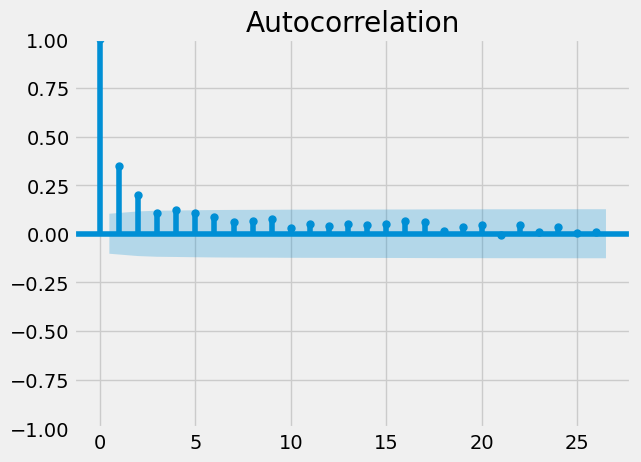

<Figure size 1500x500 with 0 Axes>

In [32]:
# Plot autocorrelations to determine parameter q

plot_acf(df)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

We have tree significant autocorrelations here (those that run beyond the blue border), so we will see what the output is like at q = 3.

### 2. Splitting the Data

In [33]:
# Split the data

train = df['avg_magnitude'][:250]
test = df['avg_magnitude'][251:]

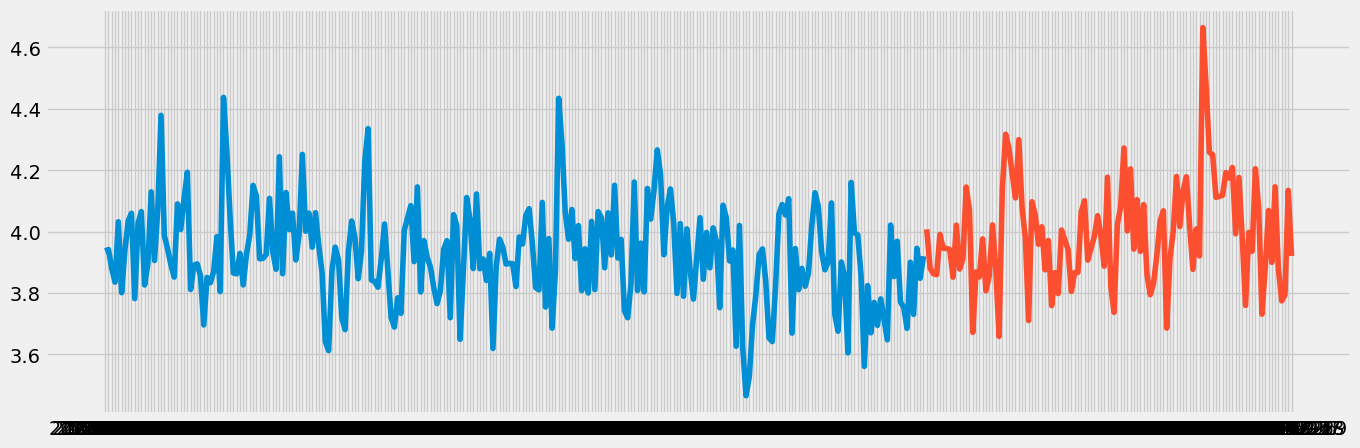

In [34]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [35]:
test.shape

(112,)

### 3. Running and Fitting the Model

In [36]:
from statsmodels.tsa.api import ARIMA # Importing the model we need

                               SARIMAX Results                                
Dep. Variable:          avg_magnitude   No. Observations:                  250
Model:                 ARIMA(5, 0, 3)   Log Likelihood                 118.556
Date:                Thu, 25 Jan 2024   AIC                           -217.112
Time:                        12:35:37   BIC                           -181.897
Sample:                    01-01-2023   HQIC                          -202.939
                         - 09-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9261      0.017    234.641      0.000       3.893       3.959
ar.L1          0.4819      2.620      0.184      0.854      -4.654       5.618
ar.L2         -0.2414      2.861     -0.084      0.9

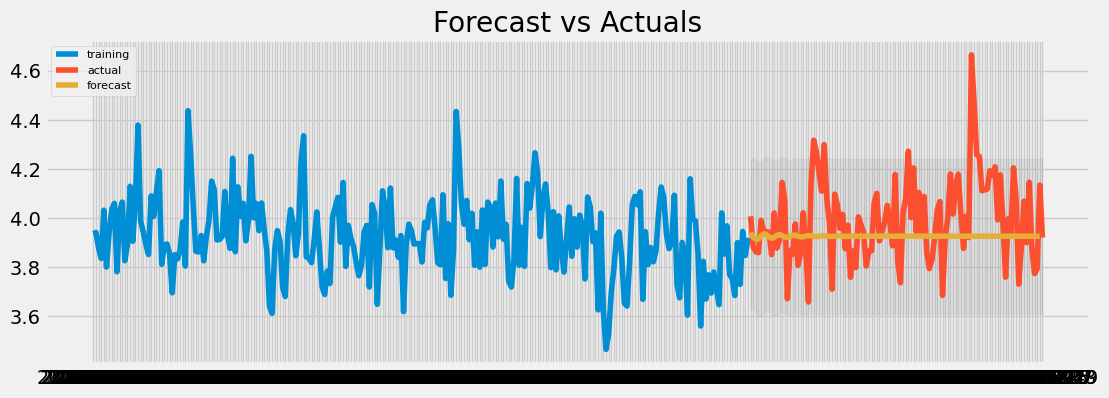

In [37]:
model = ARIMA(train, order=(5, 0, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=112, alpha=0.05)

# Extract forecast values and confidence intervals
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index)  # Lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index)  # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### 4. Iterating

                               SARIMAX Results                                
Dep. Variable:          avg_magnitude   No. Observations:                  250
Model:                 ARIMA(4, 0, 3)   Log Likelihood                 118.926
Date:                Thu, 25 Jan 2024   AIC                           -219.852
Time:                        12:35:43   BIC                           -188.159
Sample:                    01-01-2023   HQIC                          -207.096
                         - 09-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9220      0.016    245.888      0.000       3.891       3.953
ar.L1          0.7607      0.565      1.347      0.178      -0.346       1.867
ar.L2         -0.4543      0.728     -0.624      0.5

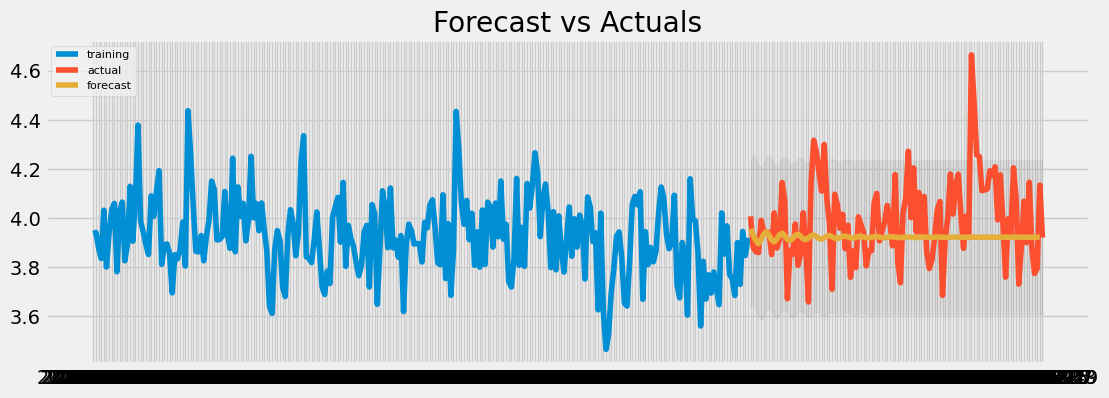

In [38]:
model = ARIMA(train, order=(4, 0, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=112, alpha=0.05)

# Extract forecast values and confidence intervals
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index)  # Lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index)  # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()